<a href="https://colab.research.google.com/github/Sravya661/NLP/blob/main/Segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyrealsense2

import os
import pyrealsense2 as rs
import numpy as np
import pandas as pd
import re
import keras
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from PIL import Image
from tensorflow.keras.models import load_model

import cv2
import tensorflow as tf
from keras import backend as K
from keras.layers import Layer
from random import randint, sample
from keras.models import model_from_json
import webcolors


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 29.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the model
model = load_model('/content/drive/MyDrive/resnet_backbone.hdf5')

In [18]:
color_map = {
    #0: ([135,206,235], 'sky'), #blue
    0: ([211, 211, 211], 'road'), #light gray
    1: ([135,206,235], 'sky'), #blue
    2: ([128, 128, 0], 'trees'), #olive
    3: ([192,192,128], 'Pole'), #light olive
    4: ([192,128,128], 'SignSymbol'),#violet red
    5: ([64,64,128], 'Fence'), #dark blue
    6: ([64,0,128], 'Car'), #purple
    7: ([0,128,192], 'Pedestrian'),
    8: ([0, 0, 0],'black')
}

img = "/content/WhatsApp Image 2024-06-24 at 4.57.30 PM.jpeg"

In [19]:
# Create a directory to store the output images
output_dir = 'To_The_Output'
os.makedirs(output_dir, exist_ok=True)

Image loaded successfully from /content/WhatsApp Image 2024-06-24 at 4.57.30 PM.jpeg
1/1 [==============================] - 0s 22ms/step
Processed image: /content/WhatsApp Image 2024-06-24 at 4.57.30 PM.jpeg
Category: 0, Color: [211, 211, 211], Color Name: road
Category: 1, Color: [135, 206, 235], Color Name: sky
Category: 2, Color: [128, 128, 0], Color Name: trees
Category: 3, Color: [192, 192, 128], Color Name: Pole
Category: 4, Color: [192, 128, 128], Color Name: SignSymbol
Category: 6, Color: [64, 0, 128], Color Name: Car


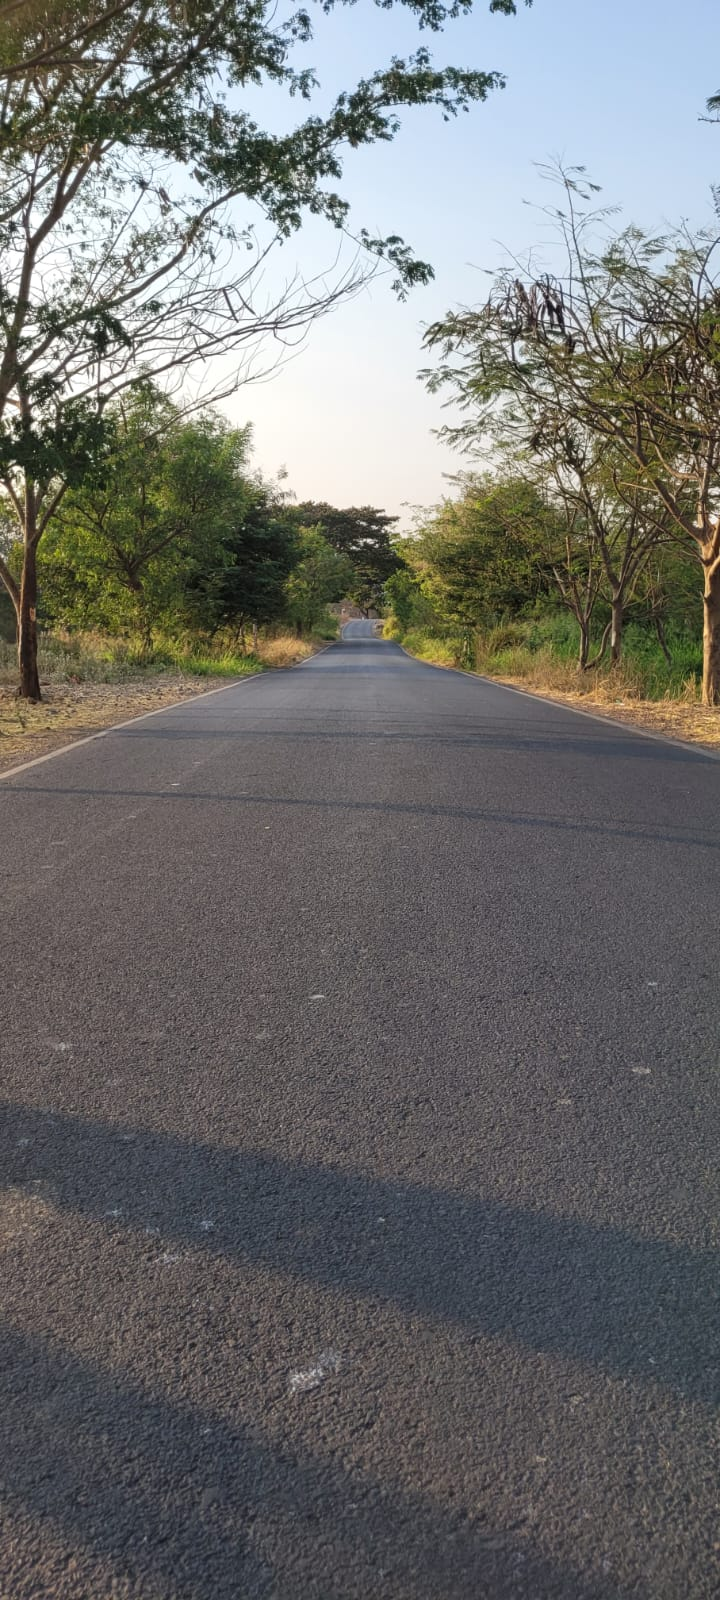

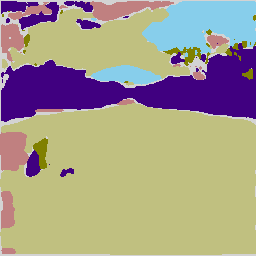

In [20]:
# Read the image
image_path = img
im_h = cv2.imread(image_path)

# Check if the image is loaded correctly
if im_h is None:
    print(f"Error: Unable to load image at path {image_path}")
else:
    print(f"Image loaded successfully from {image_path}")

    # Perform semantic segmentation if the image is loaded successfully
    image = cv2.cvtColor(im_h, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256))
    image = Image.fromarray(image)
    image = np.array(image)
    image = np.expand_dims(image, 0)
    prediction = model.predict(image)

    predicted_img = np.argmax(prediction, axis=3)[0, :, :]
    prediction_rgb = np.zeros((predicted_img.shape[0], predicted_img.shape[1], 3), dtype=np.uint8)
    for class_index, (color_rgb, _) in color_map.items():
        prediction_rgb[predicted_img == class_index] = color_rgb

    # Save the output image
    output_image_path = os.path.join(output_dir, f'{os.path.splitext(os.path.basename(image_path))[0]}_output.png')
    cv2.imwrite(output_image_path, prediction_rgb)

    print(f"Processed image: {image_path}")
    unique_values = np.unique(predicted_img)
    for value in unique_values:
        color_rgb, color_name = color_map.get(value, ([0, 0, 0], 'unknown'))
        print(f"Category: {value}, Color: {color_rgb}, Color Name: {color_name}")

    # Display the images
    from google.colab.patches import cv2_imshow
    cv2_imshow(im_h)
    cv2_imshow(cv2.cvtColor(prediction_rgb, cv2.COLOR_RGB2BGR))


In [ ]:
#from google.colab.patches import cv2_imshowzzzzzzzzzz